<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Bureau_of_Customs.svg/1200px-Bureau_of_Customs.svg.png" width=20% align="center">  


<center> <font size="5"><b>Call of Duties: An Analysis of the Duties and Taxes of Imported Products in 2019</font></center>

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [23]:
from pathlib import Path
import re
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import warnings
warnings.filterwarnings("ignore")

In [3]:
%%HTML
<style>
.table1 table{
    width: 80%
}

</style>

# <span style="color:darkblue"> 1. Executive Summary </span>

Except for the year 2018, the Philippine Bureau of Customs (BoC) has consistently missed its revenue collection targets. It seems likely that the BoC would again miss their target in 2020 because of the pandemic affecting the world. This study is an exploration of the importing behavior of the Philippines using 2019 customs data. The data is part of the "Philippine Customs Imports dataset" made available by the BoC [through their website](http://customs.gov.ph/import-reports/). The researchers would like to explore the question "Where does the Bureau of Customs' income come from?"

In line with this, the researchers would like to know:

* What materials are we importing from which countries?
* How much do these materials contribute to BoC revenue?
* How does the value of duties and taxes vary relative to the dutiable value of a product?

Data were extracted from the customs website and consolidated in `Jojie` and transactions for 2019 were consolidated in a CSV file. Data and rows based on DUTIESTAXES were focused on and prepared for analysis. All data based on `DUTIESTAXES` were filtered. Concerning the `DUTIESTAXES`, a new column named `HS2` was derived from `HSCODE`, `year` and `month` was added to it, then the `HSCODES` were merged into the current dataframe. The dataframe was then analyzed and the results showed that the materials that contributed the most in the BoC’s revenue are oil, machinery, electrical components and vehicles, and the countries that provided these the most are China, Thailand, Korea, and Indonesia. The insights gathered from this analysis can inform the agency so they can reduce risks related to too much reliance on a single supplier for a particular product as well as to hit their revenue collection target by making use of its limited manpower to monitor and ensure collections knowing that certain products contribute more to revenues. This is especially relevant now as countries impose lockdowns in their economy, overreliance on a single country for a certain product might prove to be a single point of failure in the entire supply chain.



# <span style="color:darkblue"> 2. Introduction</span>  
The Philippine Bureau of Customs, an agency under the Department of Finance, performs several key functions like assessing, maintaining, collecting trade revenues and they play a lead role in maintaining stability and development in foreign trade. The BoC has a hand in helping the economic growth of the country. If the revenue collected exceeds its targets for a given year, this could contribute to helping the economy get out of the red. This is not most often the case though. For over a period of 7 years, (2010 – 2017), the BoC missed their yearly targets, only to exceed it in 2018. [[1]](https://www.manilatimes.net/2019/01/02/news/top-stories/customs-surpasses-2018-collection-target/490528/#:~:text=FOR%20the%20first%20time%20in,881%20billion.) As much as this is promising, they fell short of their target again in 2019, amid lower import volumes. [[2]](https://www.bworldonline.com/customs-bureau-fails-to-hit-2019-revenue-target/) 

In this period of a pandemic that's affecting all nations, it is understandable that the trading and importing volume per country would be affected and one could not help but think if BoC would miss their target again for the year 2020. With this in mind, it's worth looking at different factors that affect revenue collection. This data analysis focuses on determining the top product categories imported into the country, examining how they affect our revenue collection, and identifying possible opportunities to increase the Bureau of Customs revenue.

# <span style="color:darkblue"> 3. Data Processing and Cleaning </span>
The customs dataset from Jojie is a copy of the publicly released data from the Bureau of Customs Reports of Import Entries ([link](http://customs.gov.ph/import-reports/)). In research by Ken Abante, this information comes from the Bureau’s electronic2mobile (e2m) system where importers and customs brokers declare imports by filling out the Single Administrative Document (SAD) form, which is then approved by authorized customs officers after assessing the value and levying duties and taxes. The data appears to have been anonymized since it does not include any broker or importer information. [[3]](https://www.researchgate.net/publication/339066219) 

This research wishes to observe patterns in import data beginning with records from January 2019, more than a year after the implementation of the latest version of the ASEAN Harmonized Tariff Nomenclature (AHTN 2017) which sought to provide a common and consistent classification standard and tariff rates attached to goods. [[4]](https://drive.google.com/file/d/0B6XF3AhfubONMUlNV1BLUTMzeUU/view)



|Variable Name                           | Definition | Data Type|
|:-|:-|:-|
|HSCODE                                  |Harmonized Commodity Description and Coding System. Internationally-standardized system of numbers and names that describes the type of good that is shipped. | Integer |
|COUNTRYEXPORT                           |Country of export of the goods | String |
|GROSSMASSKGS                            |Mass of the goods including packaging | Float |
|NETMASSKG                               |Mass of the imported good itself without any packaging | Float |
|CUSTOMSVALUE (in Foreign Currency)      |Amount paid or payable for the imported goods | Float |
|CURRENCY                                | Currency of the import transaction (CUSTOMSVALUE) |String|
|DUTIABLE_FOREIGN (in Foreign Currency)  | Dutiable import value upon which the import duty rate will be levied  `CUSTOMSVALUE + INSURANCE + FREIGHT`     | Float |
|EXCHANGE_RATE                           |Exchange rate used from the foreign currency unit (CURRENCY) to Philippine peso | Float |
|FREIGHT  (in Foreign Currency)          |Cost of shipping of imported goods |Float|
|INSURANCE (in Foreign Currency)         |Cost of insurance of the goods |Float|
|ARRASTRE (in Foreign Currency)          |Cost of handling the cargo | Float |
|PREF_CODE                               | Preferential trade agreement used for the transaction. Reduced customs duty rates may apply on importrf goods from a country with which PH has a trade agreement. |String|
|DUTY_PAID (in PHP)                      |Customs duties paid for the imported goods |Integer|
|VATBASE (in PHP)                        |VATable value of goods upon which the VAT rate of 12% will be levied | Integer |
|VAT_PAID (in PHP)                       |Value-added taxes paid on the transaction, in Philippine peso |Integer|
|EXCISEADVALOREM (in PHP)                |Excise and ad valorem taxes on the goods |Float|
|DUTIESTAXES                             |Total duties and taxes paid `DUTY_PAID + VAT_PAID + EXCISEADVALOREM`|Integer|
|GOODSDESCRIPTION                        | Description of the imported goods |String|
</div>

<center><i><b>Table 1:</b> Data Dictionary of Customs Dataset</i></center>

## 3.1 Consolidate 2019 Excel Files into one CSV File

Released as Excel files, the data contains monthly customs records with no accompanying descriptions or definitions. It is also worth noting that these files are not standardized and do not have the same content. There are 41 different columns in the raw file but to have a meaningful comparison, only 15 columns (see Table 1) were chosen to be used in this analysis.


There is a total of 12 excel files from January 2019 to December 2019 and each file includes the month and year of the transactions contained within that file. A script was written to read data from all the Excel files in the customs dataset directory and consolidate them into a single DataFrame. All Excel files with the years 2019 in the name were selected and after getting the month and the year from the file name, columns with those values were added to the DataFrame before being added to the consolidated data.


The consolidated data was then saved into the gzip-compressed CSV file `customs2019.csv.gz` for easy and faster access every time it will be used in the future. 

A total of 3,794,776 import shipments were recorded by BoC from January 2019 to December 2019. The customs release data does not have a unique identifier for these transactions code so there could be double entries. 

In [4]:
# from tqdm import tqdm_notebook
# # Retrieve customs dataset from 2019.
# path = Path('/mnt/data/public/customs/')
# files = []
# for year in ['2019']:
#     files.extend(path.glob('*' + year + '.xlsx'))
# files = [str(file) for file in files]

# # Combine all datasets in a dataframe 
# df_all = pd.DataFrame()
# for file in tqdm_notebook(files):
#     df = pd.read_excel(file)
#     pattern_month = r'(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)'
#     pattern_year = r'\d{4}'
#     month = re.findall(pattern_month, file)
#     year = re.findall(pattern_year, file)
#     df['month'] = month[0]
#     df['year'] = year[0]
#     df_all = df_all.append(df, sort=False)

# df_all.shape

In [5]:
# df_all.to_csv("customs2019.csv.gz", index=False, compression='gzip')

**Load customs data from January 2019 to December 2019**
*Columns from the consolidated file was further trimmed down and only the columns used in the study are loaded to minimize execution-time in the analysis.*

In [24]:
df1 = pd.read_csv('customs2019.csv.gz', compression='gzip',
                  usecols=['HSCODE', 'COUNTRYEXPORT', 'CUSTOMSVALUE',
                           'CURRENCY', 'DUTIABLE_FOREIGN', 'EXCHANGE_RATE',
                           'DUTIABLEVALUEPHP', 'FREIGHT', 'INSURANCE',
                           'PREF_CODE', 'DUTY_PAID', 'VAT_PAID', 
                           'EXCISEADVALOREM', 'DUTIESTAXES',
                           'GOODSDESCRIPTION', 'year'])
df1.head()

,HSCODE,COUNTRYEXPORT,CUSTOMSVALUE,CURRENCY,DUTIABLE_FOREIGN,EXCHANGE_RATE,DUTIABLEVALUEPHP,FREIGHT,INSURANCE,PREF_CODE,DUTY_PAID,VAT_PAID,EXCISEADVALOREM,DUTIESTAXES,GOODSDESCRIPTION,year
0,73011000000,CHINA,216000.00,USD,229438.89,51.033,11708955.00,13364.00,74.89,ACFTA,0,1421907,0,1421907,SHEET PILE Z SHAPE 770*343.5*8.5*12000 TOLE,2019
1,38244000000,JAPAN,46200.00,USD,150304.00,51.033,7670464.00,103180.00,924.00,JPEPA,0,1068958,0,1068958,"7,700MT CHEMICAL GYPSUM IN BULK FOR USE AS R",2019
2,84313990000,CHINA,1730190.00,USD,1831866.89,50.826,93106466.55,67073.09,34603.80,ACFTA,0,11182987,0,11182987,PAN CONVEYOR BELT CONVEYOR COMPONENT,2019
3,73089099000,CHINA,752933.08,USD,797180.18,50.826,40517479.83,29188.44,15058.66,ACFTA,0,4870064,0,4870064,GRID BRIDGE PROCESS AIR DUCT STORAGE,2019
4,84283990000,CHINA,202038.82,USD,213911.90,50.826,10872286.23,7832.30,4040.78,ACFTA,0,1307109,0,1307109,CHAIN CONVEYOR,2019


In [7]:
df1.describe()

,HSCODE,CUSTOMSVALUE,DUTIABLE_FOREIGN,EXCHANGE_RATE,DUTIABLEVALUEPHP,FREIGHT,INSURANCE,DUTY_PAID,VAT_PAID,EXCISEADVALOREM,DUTIESTAXES,year
count,3.794776e+06,3.794776e+06,3.794776e+06,3.794776e+06,3.794776e+06,3.794776e+06,3.794776e+06,3.794776e+06,3.794776e+06,3.794776e+06,3.794776e+06,3794776.0
mean,6.923999e+10,9.210593e+04,9.573394e+04,5.153954e+01,2.883647e+06,2.779397e+03,7.778899e+02,3.567569e+04,3.351352e+05,3.074327e+04,1.604089e+05,2019.0
std,2.331668e+10,4.389686e+07,4.395284e+07,4.024134e+00,2.303371e+09,2.067272e+06,4.715231e+04,3.298769e+06,2.767941e+08,4.686981e+06,3.256353e+06,0.0
min,1.012100e+09,1.000000e-02,1.000000e-02,4.000000e-03,5.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2019.0
25%,4.821109e+10,3.182400e+02,3.632900e+02,5.110700e+01,1.868900e+04,7.830000e+00,2.420000e+00,0.000000e+00,2.063000e+03,0.000000e+00,0.000000e+00,2019.0
50%,8.414903e+10,2.050000e+03,2.237560e+03,5.200100e+01,1.145765e+05,5.509000e+01,2.660000e+01,2.710000e+02,1.284200e+04,0.000000e+00,2.300000e+02,2019.0
75%,8.536700e+10,1.242024e+04,1.326853e+04,5.233900e+01,6.727522e+05,3.014500e+02,1.793300e+02,6.792000e+03,7.241500e+04,0.000000e+00,2.835800e+04,2019.0
max,9.706000e+10,8.533109e+10,8.533109e+10,6.965200e+01,4.481760e+12,4.019379e+09,7.940000e+07,6.374059e+09,5.384834e+11,8.496222e+09,6.919788e+08,2019.0


## 3.2 Get HS Chapter Description 

This report focuses on the broader categories of imported goods, also known as HS Chapters. Descriptions for HS Chapters are available online [5](https://www.foreign-trade.com/reference/hscode.htm?cat=1). A separate file `hschapters.csv` was created as a reference, which contains the two-digit HS Chapters together with the respective description.



In [8]:
hscode = pd.read_csv('hschapters.csv', names=['HS2', 'HS Description'],
                     header=0, dtype={'HS2': object})
hscode.head()

,HS2,HS Description
0,01,Live animals
1,02,Meat
2,03,Fish and crustaceans
3,04,Dairy produce
4,05,Products of animal origin


## 3.3 Check Column Values

A quick scan of the columns of the data was done and it was noted that some of the data were inconsistent. For example, `DUTIABLEVALUEPHP` should be equal to `DUTIABLE_FOREIGN` multiplied by `EXCHANGE_RATE` but the data showed a huge discrepancy between the actual and computed value `DUTIABLEVALUEPHP`. The same inaccuracy can be observed on the computation of `DUTIESTAXES` where it should be the sum of `DUTY_PAID + VAT_PAID + EXCISEADVALOREM`. But due to the lack of domain knowledge in this area, it is hard to pinpoint which of the transactions and columns are erroneous. It was assumed that the errors in `DUTY_PAID, VAT_PAID, EXCISEADVALOREM`, `DUTIABLE_FOREIGN` contributed to the discrepancy and so `DUTIESTAXES` and `DUTIABLEVALUEPHP` were mainly used in computations.

## 3.4 Exclude rows with DUTIESTAXES higher than DUTIABLEVALUEPHP

Upon exploring the entire dataset, we noticed that 11,222 of the 3,794,776 ($0.2957\%$) records have `DUTIESTAXES` values greater than their corresponding `DUTIABLEVALUEPHP` values. Furthermore, when we calculated the total value of `DUTIESTAXES` for these records, the total value comprises $2.75\%$ of the overall value of `DUTIESTAXES` for 2019. 

There is not enough information as to why some records involve higher duties and taxes paid than the dutiable value. Hence, in this study, we decided to focus only on transactions with duties and taxes less than the corresponding dutiable value in PHP. Note that focusing only on these transactions will still provide significant results given that these transactions compose $97.5\%$ of the total duties and taxes collected by the Bureau of Customs in 2019. 



In [9]:
df = df1[df1["DUTIESTAXES"] <= df1["DUTIABLEVALUEPHP"]].copy()
#df.describe()
df.head()

,HSCODE,COUNTRYEXPORT,CUSTOMSVALUE,CURRENCY,DUTIABLE_FOREIGN,EXCHANGE_RATE,DUTIABLEVALUEPHP,FREIGHT,INSURANCE,PREF_CODE,DUTY_PAID,VAT_PAID,EXCISEADVALOREM,DUTIESTAXES,GOODSDESCRIPTION,year
0,73011000000,CHINA,216000.00,USD,229438.89,51.033,11708955.00,13364.00,74.89,ACFTA,0,1421907,0,1421907,SHEET PILE Z SHAPE 770*343.5*8.5*12000 TOLE,2019
1,38244000000,JAPAN,46200.00,USD,150304.00,51.033,7670464.00,103180.00,924.00,JPEPA,0,1068958,0,1068958,"7,700MT CHEMICAL GYPSUM IN BULK FOR USE AS R",2019
2,84313990000,CHINA,1730190.00,USD,1831866.89,50.826,93106466.55,67073.09,34603.80,ACFTA,0,11182987,0,11182987,PAN CONVEYOR BELT CONVEYOR COMPONENT,2019
3,73089099000,CHINA,752933.08,USD,797180.18,50.826,40517479.83,29188.44,15058.66,ACFTA,0,4870064,0,4870064,GRID BRIDGE PROCESS AIR DUCT STORAGE,2019
4,84283990000,CHINA,202038.82,USD,213911.90,50.826,10872286.23,7832.30,4040.78,ACFTA,0,1307109,0,1307109,CHAIN CONVEYOR,2019


## 3.5 Add new columns

Every two digits of the `HSCODE` represent a category with the first two digits representing a general category and the next pairs represent more specific subcategories under the main category. HS Chapter of goods imported is not included in the raw data but it can be derived from the `HSCODE` column by getting the first two digits of the `HSCODE`. 

`DUTIESRATIO` new column was computed from `DUTIABLEVALUEPHP` divided by `DUTIESTAXES`.

`MONTH` and `YEAR` columns were added during the file consolidation.

<div class = "table1">

|Variable Name                           | Definition | Data Type |
|:-|:-|:-|
|MONTH                                   |Month of the Transaction | String |
|YEAR                                    |Year of the Transaction | Integer |
|HS2                                     |HS Chapter; First 2 digits of HSCODE  | String |
|DUTIESRATIO                             |Ratio of DUTIESTAXES to DUTIABLEVALUEPHP | Float |
</div>

 

<center><i><b>Table 2:</b> Additional Columns for Processing</i></center>


In [10]:
hs_2digit = df['HSCODE'].astype(str).str[:2].tolist()
df.insert(loc=1, column='HS2', value=hs_2digit)
df = pd.merge(df, hscode, on='HS2')
df.head()

,HSCODE,HS2,COUNTRYEXPORT,CUSTOMSVALUE,CURRENCY,DUTIABLE_FOREIGN,EXCHANGE_RATE,DUTIABLEVALUEPHP,FREIGHT,INSURANCE,PREF_CODE,DUTY_PAID,VAT_PAID,EXCISEADVALOREM,DUTIESTAXES,GOODSDESCRIPTION,year,HS Description
0,73011000000,73,CHINA,216000.00,USD,229438.89,51.033,11708955.00,13364.00,74.89,ACFTA,0,1421907,0,1421907,SHEET PILE Z SHAPE 770*343.5*8.5*12000 TOLE,2019,Articles of iron or steel
1,73089099000,73,CHINA,752933.08,USD,797180.18,50.826,40517479.83,29188.44,15058.66,ACFTA,0,4870064,0,4870064,GRID BRIDGE PROCESS AIR DUCT STORAGE,2019,Articles of iron or steel
2,73251090000,73,CHINA,156748.18,USD,165959.69,50.826,8435067.20,6076.55,3134.96,ACFTA,0,1014430,0,1014430,HEAT RESISTANT STEEL,2019,Articles of iron or steel
3,73079990000,73,CHINA,67502.93,USD,71469.83,50.826,3632525.58,2616.84,1350.06,ACFTA,0,437782,0,437782,EXPANSION JOINT,2019,Articles of iron or steel
4,73090019000,73,CHINA,20919.07,USD,22148.41,50.826,1125715.09,810.96,418.38,ACFTA,0,136784,0,136784,WATER TANK,2019,Articles of iron or steel


# <span style="color:darkblue">4. Exploratory Data Analysis</span> 

### TOP COUNTRIES IN TERMS OF DUTIES AND TAXES PAID IN 2019

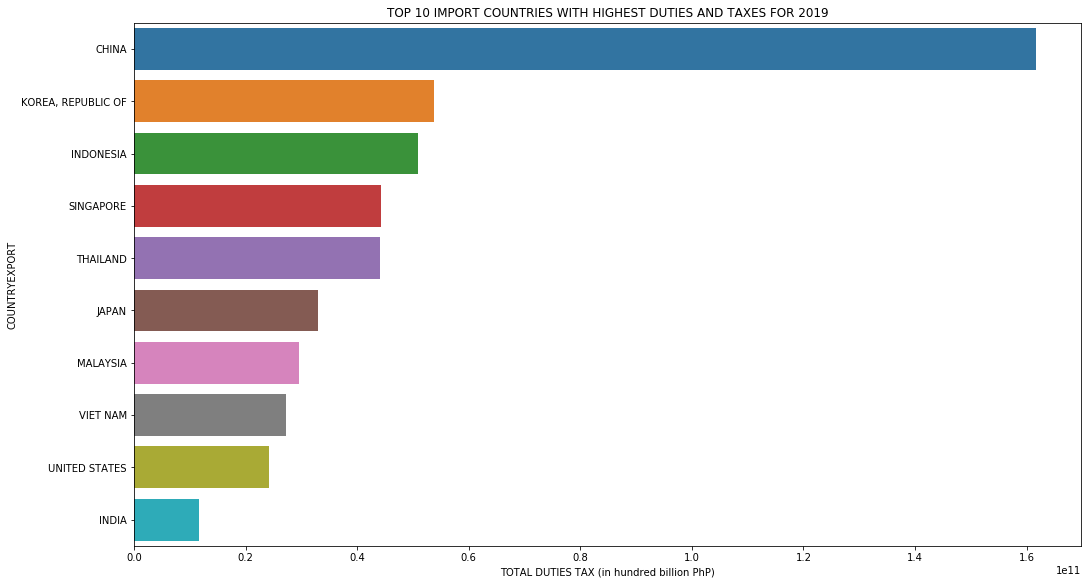

In [11]:
top_tax19 = (df.groupby("COUNTRYEXPORT")[["COUNTRYEXPORT","DUTIESTAXES"]]
             .agg(sum).nlargest(10, columns="DUTIESTAXES").reset_index())
top_tax19 = top_tax19.rename(columns={"DUTIESTAXES" : "TOTAL_DUTIESTAX"})

fig, ax = plt.subplots(figsize=(15, 8), constrained_layout=True)


sns.barplot(x="TOTAL_DUTIESTAX", y="COUNTRYEXPORT", 
            data=top_tax19)
ax.set_title("TOP 10 IMPORT COUNTRIES WITH HIGHEST DUTIES AND TAXES FOR 2019")
ax.set_xlabel("TOTAL DUTIES TAX (in hundred billion PhP)")

ax;

In the previous graph, we can see the 10 largest countries by total duties and tax collection in hundreds of billion of PHP for the year 2019. From the graph, it is possible to see the scale of each country's contribution to the total, with China, the top country, contributing more than double that of the second country, Korea. <br>

It is also important to mention that the top 4 countries in terms of contribution to duties and taxes correspond to a proportion of around 50% shown below.

In [12]:
print("Proportion of Duties/Taxes of the TOP 4 Countries (2019): {:.2f}%"
      .format(
          sum(top_tax19.TOTAL_DUTIESTAX[:4]) / sum(df.DUTIESTAXES) * 100))

Proportion of Duties/Taxes of the TOP 4 Countries (2019): 52.39%


### TOP HS CHAPTERS BASED ON DUTIES AND TAXES

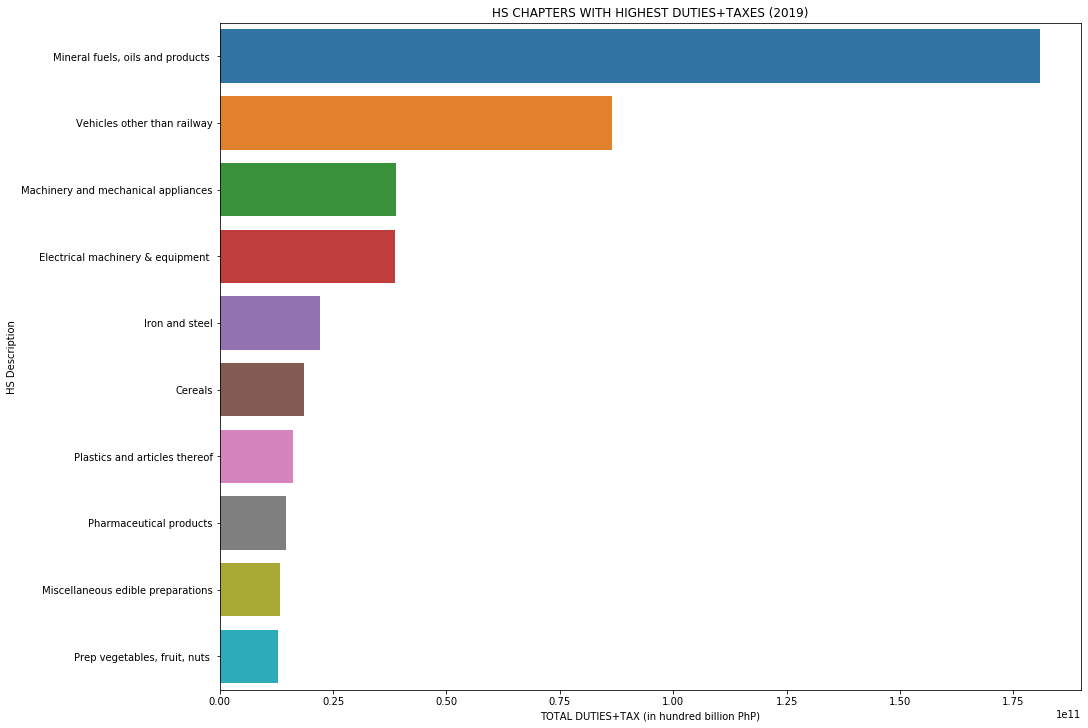

In [13]:
top_hs19 = (df.groupby("HS Description")[["DUTIESTAXES"]]
            .agg(sum).nlargest(10, columns="DUTIESTAXES").reset_index())


fig, ax = plt.subplots(figsize=(15, 10), constrained_layout=True)


sns.barplot(y="HS Description", x="DUTIESTAXES", data=top_hs19)
ax.set_title("HS CHAPTERS WITH HIGHEST DUTIES+TAXES (2019)")
ax.set_xlabel("TOTAL DUTIES+TAX (in hundred billion PhP)")

ax;

In the previous graph, we can see the duties and taxes collected for the top 10 countries for 2019 separated by chapters of the harmonized tariff system. From the graph, we can see a large portion of imported products correspond to mineral fuels and oils, including coal and petroleum.


In the next sections, we analyze the data with more detail. 

Following this, you can find a proportion of the total amount of revenue collected by the Bureau of the principal 4 chapters of the harmonized tariff system.

In [14]:
print("Proportion of the top 4 HS chapters by DUTIESTAXES (2019): ", 
      sum(top_hs19.DUTIESTAXES[:4]) / sum(df.DUTIESTAXES))

Proportion of the top 4 HS chapters by DUTIESTAXES (2019):  0.5811713578375313


## 4.1 TOP COUNTRIES PER HS CHAPTER BASED ON DUTIES AND TAXES

In this section, we analyze the four origin countries of imports which paid the highest total duties and taxes in 2019. Note that the total duties and taxes collected from products imported from these four countries alone already comprise $38.8\%$ of the total duties and taxes collected in 2019. After this, we determined the top 5 HS chapters of products for each of the four countries in terms of the total duties and taxes collected. It is worth noting that for each origin country of imports, the total duties and taxes collected for products under these top 5 HS chapters have an aggregate share of around $65\% - 90\%$ of the total duties and taxes collected from products originating from that country. Hence, the results of this analysis will still have significant inputs in terms of the overall analysis of the duties and taxes collected from imported products. 

As shown in the table below, products imported from `China`, `Republic of Korea (South Korea)`, `Indonesia` and `Singapore`provided the highest total duties and taxes in 2019. As mentioned, total duties and taxes collected from products originating from these countries compose $38.8\%$ of the total duties and taxes collection in 2019.

As shown in the table below, products imported from `China`, `Republic of Korea (South Korea)`, `Indonesia` and `Singapore`provided the highest total duties and taxes in 2019. As mentioned, total duties and taxes collected from products originating from these countries compose $38.8\%$ of the total duties and taxes collection in 2019.

In [15]:
# Get top 4 COUNTRYEXPORT Chapters based on DUTIESTAXES.
def top_country(df):
    """Return list of top 4 COUNTRYEXPORT in terms of DUTIESTAXES."""
    top = (df.groupby("COUNTRYEXPORT")[["DUTIESTAXES"]]
           .agg(sum).nlargest(4, "DUTIESTAXES").reset_index())
    return top.COUNTRYEXPORT.to_list()


# Get Top 5 HS for each COUNTRYEXPORT based on DUTIESTAXES.
def country_byhsratio(df, ctry):
    """Return DataFrame of top 5 HS per COUNTRYEXPORT."""
    top = (df[(df['COUNTRYEXPORT'] == ctry)]
           .groupby(["COUNTRYEXPORT", "HS2", "HS Description"])
           [["DUTIABLEVALUEPHP", "DUTIESTAXES"]]
           .agg(np.sum).nlargest(5, "DUTIESTAXES").reset_index())
    top["DUTIESRATIO"] = top["DUTIESTAXES"] / top["DUTIABLEVALUEPHP"]
    return top


# Only transactions with DUTIESTAXES < DUTIABLEVALUEPHP are included
df_valid = df[df['DUTIESTAXES'] < df['DUTIABLEVALUEPHP']]

# Combine the top 5 HS Chapter of the top 4 COUNTRYEXPORT.
hs_country = pd.DataFrame()
for hs in top_country(df_valid):
    df_hs = country_byhsratio(df_valid, hs)
    hs_country = hs_country.append(df_hs, ignore_index=True)
hs_country.head(20)

,COUNTRYEXPORT,HS2,HS Description,DUTIABLEVALUEPHP,DUTIESTAXES,DUTIESRATIO
0,CHINA,27,"Mineral fuels, oils and products",1.834516e+11,56712039199,0.309139
1,CHINA,85,Electrical machinery & equipment,3.015716e+11,17056282171,0.056558
2,CHINA,84,Machinery and mechanical appliances,1.614548e+11,13014022974,0.080605
3,CHINA,72,Iron and steel,8.783957e+10,10144562047,0.115490
4,CHINA,87,Vehicles other than railway,5.303461e+10,8910859976,0.168020
5,"KOREA, REPUBLIC OF",27,"Mineral fuels, oils and products",1.161549e+11,40856744268,0.351744
6,"KOREA, REPUBLIC OF",87,Vehicles other than railway,1.733356e+10,3639701810,0.209980
7,"KOREA, REPUBLIC OF",84,Machinery and mechanical appliances,3.275525e+10,1728752553,0.052778
8,"KOREA, REPUBLIC OF",72,Iron and steel,1.030839e+10,902009081,0.087502
9,"KOREA, REPUBLIC OF",85,Electrical machinery & equipment,1.773141e+11,665029889,0.003751


The information shown in the table is summarized in the `DUTIABLE VALUE AND DUTIES/TAXES OF IMPORTS BY HS CHAPTER` bar graphs shown below. 

__Note:__ There is a difference between the maximum values shown in the y-axes of the `DUTIABLE VALUE` and `DUTIES/TAXES` bar graphs. The maximum value of the y-axis of the DUTIES AND TAXES was lowered so that some bar graphs will be visible enough for visualization. 

In [16]:
def sortedgroupedbar(ax, x ,y, groupby, data=None, width=0.8, **kwargs):
    """Sort values per HS chapter."""
    order = np.zeros(len(data))
    df = data.copy()
    for xi in np.unique(df[x].values):
        group = data[df[x] == xi]
        a = group[y].values
        b = sorted(np.arange(len(a)),key=lambda x:a[x],reverse=True)
        c = sorted(np.arange(len(a)),key=lambda x:b[x])
        order[data[x] == xi] = c   
    df["order"] = order
    u, df["ind"] = np.unique(df[x].values, return_inverse=True)
    step = width/len(np.unique(df[groupby].values))
    for xi,grp in df.groupby(groupby):
        ax.bar(grp["ind"]-width/2.+grp["order"]*step+step/2.,
               grp[y],width=step, label=xi, **kwargs)
    ax.legend(title=groupby)
    ax.set_xticks(np.arange(len(u)))
    ax.set_xticklabels(u)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

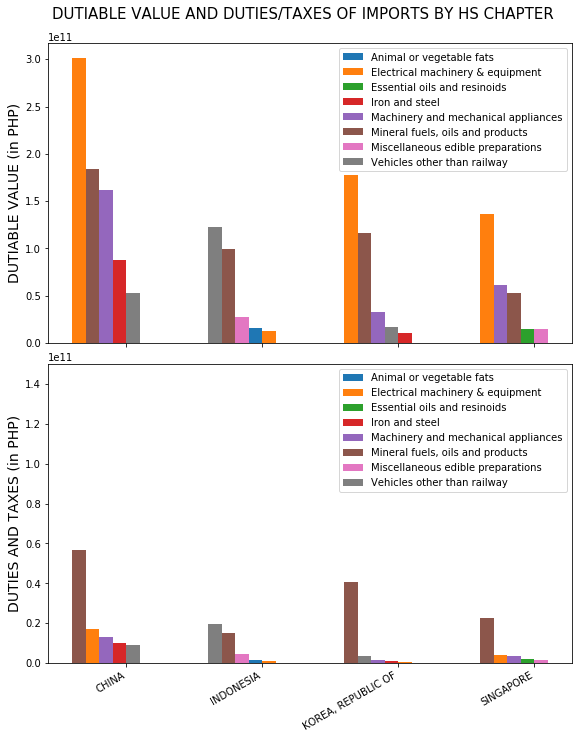

In [17]:
fig, ax = plt.subplots(2,1,figsize=(8,10),sharex=True)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("DUTIABLE VALUE AND DUTIES/TAXES OF IMPORTS BY HS CHAPTER",
             fontsize=15)

sortedgroupedbar(ax[0], x="COUNTRYEXPORT", y='DUTIABLEVALUEPHP', 
                 groupby="HS Description", data=hs_country)
ax[0].set_xlabel("")
ax[0].set_ylabel("DUTIABLE VALUE (in PHP)", fontsize=14)
ax[0].legend(loc='best')

sortedgroupedbar(ax[1], x="COUNTRYEXPORT", y='DUTIESTAXES', 
                 groupby="HS Description", data=hs_country)
ax[1].set_xlabel("")
ax[1].set_ylabel("DUTIES AND TAXES (in PHP)", fontsize=14)
ax[1].legend(loc='best')
ax[1].set_ylim(0, 1.5e11)

plt.xticks(rotation=30, ha="right");

__Observation (`DUTIABLE VALUE AND DUTIES/TAXES OF IMPORTS BY HS CHAPTER` graph):__

Based on the `DUTIABLE VALUE` bar graph a bulk of the total dutiable value is from products classified under the `Electrical machinery & equipment`. However, if you look at the `DUTIES AND TAXES` bar graph, the highest duties and taxes paid are not from products classified under `Electrical machinery & equipment` chapter, as many would think. It turns out that a chunk of the duties and taxes paid came from products classified under `Mineral fuels, oils, and products` and `vehicles other than  railway`.

To have a clearer picture of how the values of duties and taxes vary along with the dutiable value involved, the `DUTIES RATIO` graph is given below. As defined, duties ratio is simply the value of the duties and taxes paid <em>as a percentage</em> of the dutiable value involved. 

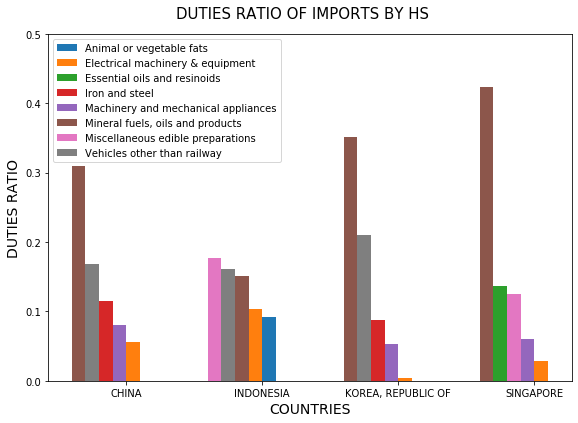

In [18]:
fig, ax = plt.subplots(figsize=(8, 5.88))
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("DUTIES RATIO OF IMPORTS BY HS", fontsize=15)
sortedgroupedbar(ax, x="COUNTRYEXPORT", y='DUTIESRATIO', 
                 groupby="HS Description", data=hs_country)
ax.set_xlabel("COUNTRIES", fontsize=14)
ax.set_ylabel("DUTIES RATIO", fontsize=14)
ax.set_ylim(0, 0.5)
ax.legend(loc='best');

__Analysis of the `DUTIABLE VALUE AND DUTIES/TAXES` and `DUTIES RATIO` graphs:__

Observe that the duties ratio is `stable` for products imported from Indonesia under the selected HS chapters. The two largest importers of electrical machinery and equipment, South Korea and China, have the lowest duties ratio despite the large amount of dutiable values involved in these products. Hence we came up with the following insight.

__Insight: Higher dutiable value involved does not necessarily mean that higher duties and taxes will be paid. Duties ratio vary by country where the imports originated.__

__Reason:__ In fact one of the reasons that can explain this behavior is the economic development policies of the country. The Philippines is a country that has been in constant development during the last years. In order to keep up with this development, the country needs to import certain commodities that can help achieve these goals. 

In this case, we can see that commodities like `Electrical machinery and equipment` and `Machinery and mechanical appliances` have in general very low taxes independent. This could mean the government is providing benefits for companies to import these items in order to provide long term returns for the country. This might be a long term policy to incentive industrial development and in overall diversify the economy of the country.

Another possible reason to incentivize low prices is low competition in the internal and external markets. For a fact we were able to see how products like Rice and similar commodities are highly taxed in order to protect the internal economy. However for commodities like `Electrical machinery and equipment` and `Machinery and mechanical appliances`, the internal competition is very low. Meaning, the government has a low incentive to protect internal industries that manufacture these components. As well, machinery and equipment are very specialized sectors with low competition, which might mean there is a strong influence from the producer to maintain low prices.   

On the other hand, it can also be observed that the duties ratio of products under `Mineral fuels, oils and products` is significantly higher than the other HS chapters in 3 of the 4 countries (China, South Korea, Singapore).  

__Insight: Products under `Mineral fuels, oils and products` may not be the highest in terms of the dutiable value involved but they contribute the most in the duties and taxes collection.__

__Reason:__ In an analysis of Rappler, taxes on `Mineral fuels, oils and products` are made as an environmental and anti-poor measure. In fact, this is possible as an increase in the tax applied to products like oil or gas might reduce the usage of vehicles and incentive the usage of public transportation. This might as well explain the taxes imposed on vehicles that are very high and the second resource of revenue for the bureau. However, it is contradicting as the country has taken very few efforts to improve the public transportation service. 

## 4.2 TOP HS CHAPTERS PER COUNTRY BASED ON DUTIES AND TAXES

In this section, we will focus on the four HS chapters with the highest total duties and taxes paid in 2019. Note that the total duties and taxes collected from imported products under these HS chapters is equivalent to __nearly half__ of the total duties and taxes collection in 2019. Moreover, we will explore how the values of duties and taxes vary per country. Only the top five highest paying countries for each HS chapter are considered. However, it is worth noting that for each HS chapter, these top five countries have an aggregate share of around $70\%-85\%$ of the total duties and taxes paid specific to that HS chapter in 2019. With these considerations, the results of the exploratory data analysis will still be significant given their share in the total paid duties and taxes. 


As shown in the table below, products classified under `Mineral fuels, oils and products`, `Vehicles other than railway	`, `Machinery and mechanical appliances` and `Electrical machinery & equipment` are the top contributors to the total duties and taxes in 2019. As mentioned, total duties and taxes collected from these products amounted roughly $50\%$ of the overall duties and taxes. 


In [19]:
# Get top 4 HS Chapters based on DUTIESTAXES. 
def top_hs_year(df):
    """Return list of top 4 HS in terms of total duties and taxes paid."""
    
    top = (df.groupby(["HS2","HS Description"])[["DUTIESTAXES"]]
           .agg(sum).nlargest(4, "DUTIESTAXES").reset_index())
    return top.HS2.to_list()

def country_byhsratio(df, hs):
    """Return DataFrame of top 5 countries per HS based on total duties and 
    taxes paid.
    """
    
    top = (df[(df['HS2'] == hs)]
           .groupby(["HS2","HS Description", "COUNTRYEXPORT"])
           [["DUTIABLEVALUEPHP", "DUTIESTAXES"]].agg(np.sum)
           .nlargest(5, "DUTIESTAXES").reset_index())
    top["DUTIESRATIO"] = top["DUTIESTAXES"] / top["DUTIABLEVALUEPHP"]
    return top

# Combine in a daframe the top 5 countries from 2017-2020 per HS Chapter.
country_hs = pd.DataFrame()
for hs in top_hs_year(df):
    df_hs = country_byhsratio(df, hs)
    country_hs = country_hs.append(df_hs, ignore_index=True)
country_hs.head(30)

,HS2,HS Description,COUNTRYEXPORT,DUTIABLEVALUEPHP,DUTIESTAXES,DUTIESRATIO
0,27,"Mineral fuels, oils and products",CHINA,1.834516e+11,56712039199,0.309139
1,27,"Mineral fuels, oils and products","KOREA, REPUBLIC OF",1.161549e+11,40856744268,0.351744
2,27,"Mineral fuels, oils and products",SINGAPORE,5.324746e+10,22537265074,0.423255
3,27,"Mineral fuels, oils and products",INDONESIA,9.885390e+10,14931488591,0.151046
4,27,"Mineral fuels, oils and products",MALAYSIA,4.581634e+10,14522422983,0.316970
5,87,Vehicles other than railway,THAILAND,1.399958e+11,23972455055,0.171237
6,87,Vehicles other than railway,INDONESIA,1.227132e+11,19715697058,0.160665
7,87,Vehicles other than railway,JAPAN,7.426183e+10,19012078201,0.256014
8,87,Vehicles other than railway,CHINA,5.303461e+10,8910859976,0.168020
9,87,Vehicles other than railway,"KOREA, REPUBLIC OF",1.733356e+10,3639701810,0.209980


The information shown in the table are summarized in the `DUTIABLE VALUE AND DUTIES/TAXES` bar graph shown below.

In [20]:
def sortedgroupedbar(ax, x ,y, groupby, data=None, width=0.8, **kwargs):
    """Sort values per HS chapter."""
    order = np.zeros(len(data))
    df = data.copy()
    for xi in np.unique(df[x].values):
        group = data[df[x] == xi]
        a = group[y].values
        b = sorted(np.arange(len(a)),key=lambda x:a[x],reverse=True)
        c = sorted(np.arange(len(a)),key=lambda x:b[x])
        order[data[x] == xi] = c   
    df["order"] = order
    u, df["ind"] = np.unique(df[x].values, return_inverse=True)
    step = width/len(np.unique(df[groupby].values))
    for xi,grp in df.groupby(groupby):
        ax.bar(grp["ind"]-width/2.+grp["order"]*step+step/2.,
               grp[y],width=step, label=xi, **kwargs)
    ax.legend(title=groupby)
    ax.set_xticks(np.arange(len(u)))
    ax.set_xticklabels(u)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

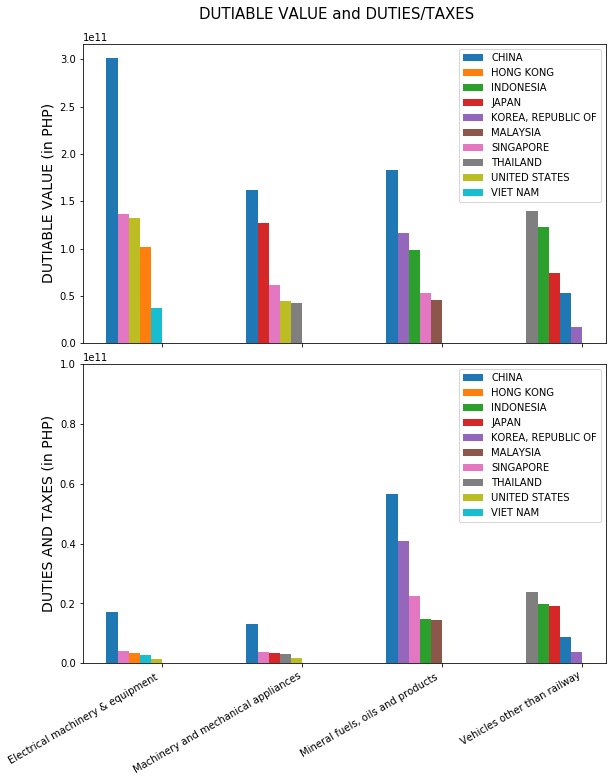

In [21]:
fig, ax = plt.subplots(2,1,figsize=(8,10),sharex=True)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("DUTIABLE VALUE and DUTIES/TAXES", fontsize=15)

sortedgroupedbar(ax[0], x="HS Description", y='DUTIABLEVALUEPHP', 
                 groupby="COUNTRYEXPORT", data=country_hs)
ax[0].set_xlabel("")
ax[0].set_ylabel("DUTIABLE VALUE (in PHP)", fontsize=14)
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.65))
ax[0].legend(loc='best')

sortedgroupedbar(ax[1], x="HS Description", y='DUTIESTAXES', 
                 groupby="COUNTRYEXPORT", data=country_hs)
ax[1].set_xlabel("")
ax[1].set_ylabel("DUTIES AND TAXES (in PHP)", fontsize=14)
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.65))
ax[1].legend(loc='best')
ax[1].set_ylim(0, 1e11)

plt.xticks(rotation=30, ha="right");

__Observation (`DUTIABLE VALUE AND DUTIES/TAXES` graph):__

Comparing the total dutiable value involved in the transactions and total duties and taxes paid, it can be easily noticed that higher dutiable value does not necessarily imply higher duties and taxes due. 

To have a clearer picture of how the values of duties and taxes vary along with the dutiable value involved, the `DUTIES RATIO` graph is given below. As defined, duties ratio is simply the value of the duties and taxes paid <em>as a percentage</em> of the dutiable value involved. 

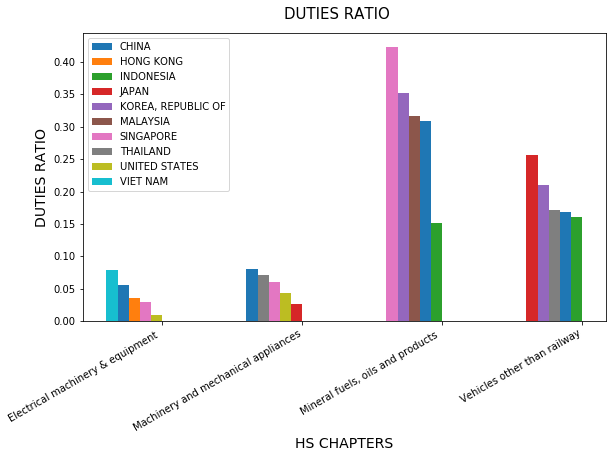

In [22]:
fig, ax = plt.subplots(figsize=(8,5))
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("DUTIES RATIO", fontsize=15)

sortedgroupedbar(ax, x="HS Description", y='DUTIESRATIO', 
                 groupby="COUNTRYEXPORT", data=country_hs)
ax.set_xlabel("HS CHAPTERS", fontsize=14)
ax.set_ylabel("DUTIES RATIO", fontsize=14)
ax.legend(loc='best')
plt.xticks(rotation=30, ha="right");

__Analysis of the `DUTIABLE VALUE AND DUTIES/TAXES` and `DUTIES RATIO` graphs:__

Products classified under <em>Electrical machinery & equipment</em> have the highest dutiable value involved. However, the duties and taxes collected from these products are not the highest. The highest duties and taxes collected arere from products classified under <em>Mineral fuels, oils, and products</em>. If you observe in the `DUTIES RATIO` table, duties and taxes collected from <em>Mineral fuels, oils and products</em> products comprised $15\%-45\%$ of the dutiable value involved, while the ratio is only $2\%-8\%$ for <em>Electrical machinery & equipment</em> products. This leads us to this insight.

__Insight: Higher dutiable value involved does not necessarily mean that higher duties and taxes will be paid. Duties ratio vary by HS chapter.__

__Reason:__ As explained in the insights of 4.1, some of the reasons why some products might have lower taxes are related to government development policies. For example products from the `Mineral fuels, oils, and products` are highly taxed as an environmental and anti-poor measure. Otherwise, products like  `Machinery and mechanical appliances` and `Electrical machinery & equipment` might be less taxed as there is no reason to protect the internal economy and are products necessary for the industrial development of the country.

On the other hand, observe that in 3 out of 4 HS chapters, products from China involved the highest dutiable value. One would perhaps think that this implies higher duties and taxes to be collected from China. If we base it on the value of duties and taxes paid, the assumption is true. However, if we base it on the `DUTIES RATIO` graph, imports from China did not contribute the highest in terms of duties and taxes collected as a percentage of the dutiable value involved. The contrary is also observed in some countries. Take as an example product from Singapore classified under <em>Mineral fuels, oils, and products</em>. Even though it is not the highest in terms of duties and taxes paid and dutiable value involved, it has the highest duties ratio. This means that the duties and taxes paid is high (40%) relative to the dutiable value involved. This leads to our next insight.

__Insight: For products within the same HS chapter, the higher dutiable value of imports from a certain country does NOT necessarily imply that duties and taxes as a percentage of the dutiable value are also high. Imported products from some countries with lower dutiable value involved may pay a higher percentage of duties and taxes relative to the dutiable value.__

__Reason:__ In fact the HS chapter `Electrical machinery & equipment` has the highest dutiable value, but `Mineral fuels, oils, and products` chapter is the one that brings the highest revenue to the Bureau. This is explained by the same reason as the government has incentives to protect some internal industries or the benefit of the well-being of its citizens by providing protection measures to industries. As well, it is important to highlight that the country might as well incentive the imports of a certain commercial partner. For example, in the case of `Mineral fuels, oils and products` and `Vehicles other than railway`.

## CONCLUSION AND RECOMMENDATION

__Overall, the exploratory data analysis surfaced the following insights.__
 1. Imports from the top 10 origin countries in terms of total duties and taxes paid in 2019 comprise $79\%$ of the total duties and taxes collection of the Bureau of Customs in 2019.
 2. Imported products classified under any of the top 10 HS chapters in terms of total duties and taxes paid in 2019 comprise $72.7\%$ of the total duties and taxes collection of the Bureau of Customs in 2019.
 3. Looking at the total dutiable value of imports at a per origin country scale or at a per product classification scale, the higher total dutiable value does not necessarily imply that higher duties and taxes will be paid. The duties ratio can be used to observe this trend. To cite an example for this, in the `DUTIABLE VALUE AND DUTIES/TAXES` bar graphs in (4.1) and (4.2), it can be observed that the bars with the highest total dutiable value are not necessarily the highest bars with the highest duties and taxes. 
 
__In addition to these insights, we recommend the following.__
 1. Capitalize on products with high dutiable value but low duties ratio. Appropriate measures should be planned out and proposed to increase duties and taxes for these products. 
 2. Protection measures like imposing high taxes on `Mineral fuels, oils, and products` need to be aligned with government initiatives like improving the public transportation system and discouraging the use of private vehicles. 
 3. High taxes on products like `Mineral fuels, oils and products` and `Vehicles other than railway` are passed directly to final consumers which might mean the government is prioritizing incentives to corporations instead of the citizens. We suggest the government take a look at this and explore how this might be affecting the financial wealth of the consumers. 
 4. It is clear that the low taxes in categories like `Electrical machinery & equipment` are a measure to incentivize the industrial development of the country. However, we suggest the government to invest in developing technology and provide competitive products for the internal market.  

## ACKNOWLEDGEMENT

- Prof. Christian Alis for the guidance

## REFERENCES

The Manila Times. *“Customs surpasses 2018 collection target”*. Accessed June 5, 2020. https://www.manilatimes.net/2019/01/02/news/top-stories/customs-surpasses-2018-collection-target/490528/ 

Business World. *“Customs bureau fails to hit 2019 revenue target”*. Accessed June 5, 2020. https://www.bworldonline.com/customs-bureau-fails-to-hit-2019-revenue-target/ 

Tariff Commission. *“The ASEAN Harmonized Tariff Nomenclature (AHTN) 2017”* Accessed June 5, 2020. https://tariffcommission.gov.ph/tariff-book 

Abante, Ken. (2020). *An Open Data Set of Twenty Million Import Transactions from the Bureau of Customs of the Philippines (2012-2019)*. 10.13140/RG.2.2.24053.73444. Accessed June 5, 2020. https://www.researchgate.net/publication/339066219 